In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from keras.models import load_model 


In [3]:
FOCUS_SOURCE_DIR = "dataset_2/focus/"
UNFOCUS_SOURCE_DIR = "dataset_2/unfocus/"
#DROWSY_SOURCE_DIR = "dataset_2/drowsy/"

TRAINING_DIR = 'images_2/training/'
VALIDATION_DIR = 'images_2/validation/'

TRAINING_FOCUS_DIR = os.path.join(TRAINING_DIR, "focus/")
VALIDATION_FOCUS_DIR = os.path.join(VALIDATION_DIR, "focus/")

TRAINING_UNFOCUS_DIR = os.path.join(TRAINING_DIR, "unfocus/")
VALIDATION_UNFOCUS_DIR = os.path.join(VALIDATION_DIR, "unfocus/")

#TRAINING_DROWSY_DIR = os.path.join(TRAINING_DIR, "drowsy/")
#VALIDATION_DROWSY_DIR = os.path.join(VALIDATION_DIR, "drowsy/")


In [4]:
# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"Original focus's directory has {len(os.listdir(FOCUS_SOURCE_DIR))} images")
print(f"Original unfocus's directory has {len(os.listdir(UNFOCUS_SOURCE_DIR))} images")
#print(f"Original drowsy's directory has {len(os.listdir(DROWSY_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_FOCUS_DIR))} images of focus for training")
print(f"There are {len(os.listdir(TRAINING_UNFOCUS_DIR))} images of unfocus for training")
#print(f"There are {len(os.listdir(TRAINING_DROWSY_DIR))} images of drowsy for training\n")

print(f"There are {len(os.listdir(VALIDATION_FOCUS_DIR))} images of focus for validation")
print(f"There are {len(os.listdir(VALIDATION_UNFOCUS_DIR))} images of unfocus for validation")
#print(f"There are {len(os.listdir(VALIDATION_DROWSY_DIR))} images of drowsy for validation")

Original focus's directory has 12870 images
Original unfocus's directory has 12870 images
There are 9009 images of focus for training
There are 9009 images of unfocus for training
There are 3861 images of focus for validation
There are 3861 images of unfocus for validation


In [58]:
# grader-required-cell

# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  train_datagen = ImageDataGenerator(rescale=1.0/255.0)

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=20,
                                                      class_mode='binary', #categorical
                                                      target_size=(150, 150)
                                                      )

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=20,
                                                                class_mode='binary', # categorical
                                                                target_size=(150, 150)
                                                                )
  ### END CODE HERE
  return train_generator, validation_generator

In [59]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 18018 images belonging to 2 classes.
Found 7722 images belonging to 2 classes.


In [60]:
base_model = VGG16(weights='imagenet', include_top=True, input_shape=(150, 150, 3))


In [36]:
for layer in base_model.layers:
    layer.trainable = False

In [61]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [62]:
last_layer = base_model.get_layer('block1_conv2')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 150, 150, 64)


In [63]:
x = last_output
x = tf.keras.layers.MaxPooling2D(2,2) (x)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu') (x)
x = tf.keras.layers.MaxPooling2D(2,2) (x)
x = tf.keras.layers.Flatten() (x)

x = Dense(512, activation='relu')(x)  

predictions = Dense(1, activation='sigmoid')(x)  

model = Model(inputs=base_model.input, outputs=predictions)


In [64]:
from tensorflow.keras.optimizers.legacy import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
with tf.device('/GPU:0'):
    history = model.fit(
    train_generator,
    epochs=150,
    validation_data=validation_generator)


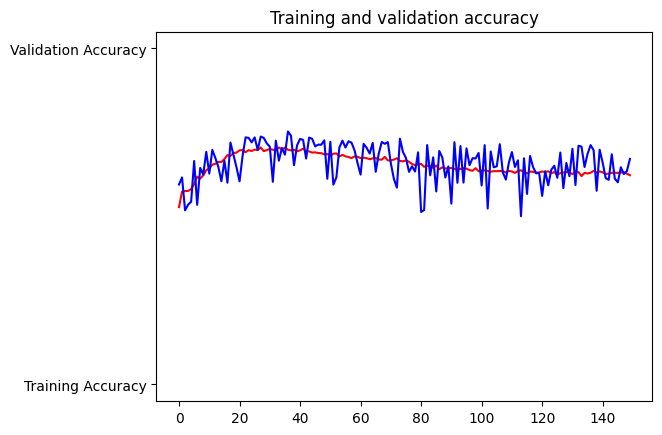

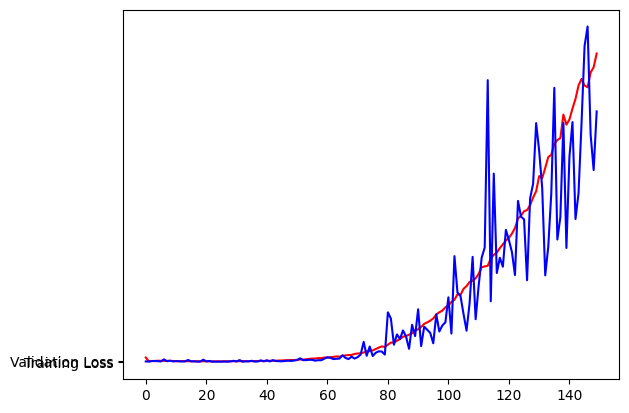

In [42]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

## VGG19

In [50]:
base_model_VGG19 = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


80134624/80134624 [==============================] - 169s 2us/step


In [51]:
x = base_model_VGG19.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Optional fully connected layer
predictions = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

model_VGG19 = Model(inputs=base_model_VGG19.input, outputs=predictions)


In [52]:
model_VGG19.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
for layer in base_model_VGG19.layers:
    layer.trainable = False


In [ ]:
with tf.device('/GPU:0'):
    history_VGG19 = model_VGG19.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator)


In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history_VGG19.history['accuracy']
val_acc=history_VGG19.history['val_accuracy']
loss=history_VGG19.history['loss']
val_loss=history_VGG19.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()